### Check input files



In [1]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


datasets/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv
datasets/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv
datasets/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv


### Import train data and create DataFrame object

In [2]:
rawsData = pd.read_csv('datasets/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv')

print("The files have been imported")


The files have been imported


In [3]:
columnsToDrop = [
    'Flow Pkts/s',
    'Timestamp',
    'Active Max',
    'Active Min',
    'Active Std',
    'Bwd IAT Max',
    'Bwd IAT Min',
    'Bwd IAT Std',
    'Bwd IAT Tot',
    'Bwd Pkt Len Max',
    'Bwd Pkt Len Min',
    'Bwd Pkt Len Std',
    'Flow IAT Max',
    'Flow IAT Min',
    'Flow IAT Std',
    'Fwd IAT Max',
    'Fwd IAT Min',
    'Fwd IAT Std',
    'Fwd IAT Tot',
    'Fwd Pkt Len Max',
    'Fwd Pkt Len Min',
    'Fwd Pkt Len Std',
    'Idle Max',
    'Idle Min',
    'Idle Std',
    'Pkt Len Max',
    'Pkt Len Min',
    'Pkt Len Std']

rawsData = rawsData.drop(columnsToDrop, axis=1)


In [4]:
LABEL = 'Label'
NORMAL = 'Benign'
GOLDEN = 'DoS attacks-GoldenEye'
SLOW = 'DoS attacks-Slowloris'


In [5]:
rawNormal = rawsData[rawsData[LABEL] == NORMAL]
rawGolden = rawsData[rawsData[LABEL] == GOLDEN]
rawSlow = rawsData[rawsData[LABEL] == SLOW]


In [6]:
from operator import itemgetter

FEATURE = 'Feature'
COUNT = 'Count'


def getNotDuplicatedFeatures(data):
    result = []
    for column in data.keys():
        feature = data[column]
        feature = feature.drop_duplicates()
        result.append({FEATURE: column, COUNT: feature.shape[0]})
    return sorted(result, key=itemgetter(COUNT), reverse=True)


In [7]:
def specialPrint(data):
    for feature in data:
        print('{0:17}  {1}'.format(feature[FEATURE], feature[COUNT]))


In [8]:
countedRawNormal = getNotDuplicatedFeatures(rawNormal)
countedRawGolden = getNotDuplicatedFeatures(rawGolden)
countedRawSlow = getNotDuplicatedFeatures(rawSlow)


In [9]:
specialPrint(countedRawNormal)
# Flow Byts/s        507315
# Flow IAT Mean      452673
# Fwd Pkts/s         449838
# Flow Duration      436450
# Fwd IAT Mean       398812
# Bwd Pkts/s         382239
# Bwd IAT Mean       305077
# Idle Mean          127446
# Active Mean        115322
# Pkt Len Var        69329
# Pkt Len Mean       56017
# Pkt Size Avg       55514
# Bwd Pkt Len Mean   38048
# Bwd Seg Size Avg   38047
# Fwd Pkt Len Mean   24991
# Fwd Seg Size Avg   24991
# TotLen Bwd Pkts    22673
# Subflow Bwd Byts   22673
# Dst Port           21732
# TotLen Fwd Pkts    7588
# Subflow Fwd Byts   7588
# Init Bwd Win Byts  5123
# Init Fwd Win Byts  4493
# Bwd Header Len     2329
# Fwd Header Len     1364
# Tot Bwd Pkts       1189
# Subflow Bwd Pkts   1189
# Tot Fwd Pkts       694
# Subflow Fwd Pkts   694
# Fwd Act Data Pkts  138
# Down/Up Ratio      48
# Fwd Seg Size Min   11
# Protocol           3
# Fwd PSH Flags      2
# FIN Flag Cnt       2
# SYN Flag Cnt       2
# RST Flag Cnt       2
# PSH Flag Cnt       2
# ACK Flag Cnt       2
# URG Flag Cnt       2
# ECE Flag Cnt       2
# Bwd PSH Flags      1
# Fwd URG Flags      1
# Bwd URG Flags      1
# CWE Flag Count     1
# Fwd Byts/b Avg     1
# Fwd Pkts/b Avg     1
# Fwd Blk Rate Avg   1
# Bwd Byts/b Avg     1
# Bwd Pkts/b Avg     1
# Bwd Blk Rate Avg   1
# Label              1

Flow Byts/s        507315
Flow IAT Mean      452673
Fwd Pkts/s         449838
Flow Duration      436450
Fwd IAT Mean       398812
Bwd Pkts/s         382239
Bwd IAT Mean       305077
Idle Mean          127446
Active Mean        115322
Pkt Len Var        69329
Pkt Len Mean       56017
Pkt Size Avg       55514
Bwd Pkt Len Mean   38048
Bwd Seg Size Avg   38047
Fwd Pkt Len Mean   24991
Fwd Seg Size Avg   24991
TotLen Bwd Pkts    22673
Subflow Bwd Byts   22673
Dst Port           21732
TotLen Fwd Pkts    7588
Subflow Fwd Byts   7588
Init Bwd Win Byts  5123
Init Fwd Win Byts  4493
Bwd Header Len     2329
Fwd Header Len     1364
Tot Bwd Pkts       1189
Subflow Bwd Pkts   1189
Tot Fwd Pkts       694
Subflow Fwd Pkts   694
Fwd Act Data Pkts  138
Down/Up Ratio      48
Fwd Seg Size Min   11
Protocol           3
Fwd PSH Flags      2
FIN Flag Cnt       2
SYN Flag Cnt       2
RST Flag Cnt       2
PSH Flag Cnt       2
ACK Flag Cnt       2
URG Flag Cnt       2
ECE Flag Cnt       2
Bwd PSH Flags      1
F

In [10]:
specialPrint(countedRawGolden)
# Flow IAT Mean      40196
# Flow Duration      40156
# Fwd Pkts/s         40156
# Fwd IAT Mean       39557
# Flow Byts/s        27769
# Bwd Pkts/s         26580
# Bwd IAT Mean       24905
# Idle Mean          19961
# Active Mean        4058
# Pkt Len Var        2734
# Pkt Len Mean       2330
# Pkt Size Avg       2260
# Fwd Pkt Len Mean   2084
# Fwd Seg Size Avg   2084
# TotLen Fwd Pkts    1355
# Subflow Fwd Byts   1355
# Fwd Header Len     44
# Tot Fwd Pkts       17
# Subflow Fwd Pkts   17
# Fwd Act Data Pkts  12
# Bwd Pkt Len Mean   7
# Bwd Header Len     7
# Bwd Seg Size Avg   7
# Init Bwd Win Byts  7
# Tot Bwd Pkts       5
# Subflow Bwd Pkts   5
# TotLen Bwd Pkts    3
# Subflow Bwd Byts   3
# Init Fwd Win Byts  3
# Fwd PSH Flags      2
# FIN Flag Cnt       2
# SYN Flag Cnt       2
# PSH Flag Cnt       2
# ACK Flag Cnt       2
# Down/Up Ratio      2
# Fwd Seg Size Min   2
# Dst Port           1
# Protocol           1
# Bwd PSH Flags      1
# Fwd URG Flags      1
# Bwd URG Flags      1
# RST Flag Cnt       1
# URG Flag Cnt       1
# CWE Flag Count     1
# ECE Flag Cnt       1
# Fwd Byts/b Avg     1
# Fwd Pkts/b Avg     1
# Fwd Blk Rate Avg   1
# Bwd Byts/b Avg     1
# Bwd Pkts/b Avg     1
# Bwd Blk Rate Avg   1
# Label              1


Flow IAT Mean      40196
Flow Duration      40156
Fwd Pkts/s         40156
Fwd IAT Mean       39557
Flow Byts/s        27769
Bwd Pkts/s         26580
Bwd IAT Mean       24905
Idle Mean          19961
Active Mean        4058
Pkt Len Var        2734
Pkt Len Mean       2330
Pkt Size Avg       2260
Fwd Pkt Len Mean   2084
Fwd Seg Size Avg   2084
TotLen Fwd Pkts    1355
Subflow Fwd Byts   1355
Fwd Header Len     44
Tot Fwd Pkts       17
Subflow Fwd Pkts   17
Fwd Act Data Pkts  12
Bwd Pkt Len Mean   7
Bwd Header Len     7
Bwd Seg Size Avg   7
Init Bwd Win Byts  7
Tot Bwd Pkts       5
Subflow Bwd Pkts   5
TotLen Bwd Pkts    3
Subflow Bwd Byts   3
Init Fwd Win Byts  3
Fwd PSH Flags      2
FIN Flag Cnt       2
SYN Flag Cnt       2
PSH Flag Cnt       2
ACK Flag Cnt       2
Down/Up Ratio      2
Fwd Seg Size Min   2
Dst Port           1
Protocol           1
Bwd PSH Flags      1
Fwd URG Flags      1
Bwd URG Flags      1
RST Flag Cnt       1
URG Flag Cnt       1
CWE Flag Count     1
ECE Flag Cnt    

In [11]:
specialPrint(countedRawSlow)
# Fwd Pkts/s         9061
# Flow IAT Mean      9058
# Flow Duration      9047
# Fwd IAT Mean       8896
# Flow Byts/s        7132
# Bwd Pkts/s         7117
# Idle Mean          6573
# Bwd IAT Mean       6553
# Active Mean        4495
# Pkt Len Mean       53
# Pkt Size Avg       53
# Pkt Len Var        51
# Fwd Pkt Len Mean   46
# Fwd Seg Size Avg   46
# Fwd Header Len     31
# TotLen Fwd Pkts    26
# Subflow Fwd Byts   26
# Tot Fwd Pkts       16
# Subflow Fwd Pkts   16
# Fwd Act Data Pkts  12
# Bwd Header Len     10
# Tot Bwd Pkts       5
# Subflow Bwd Pkts   5
# Init Bwd Win Byts  4
# Down/Up Ratio      3
# Init Fwd Win Byts  3
# Fwd Seg Size Min   3
# TotLen Bwd Pkts    2
# Bwd Pkt Len Mean   2
# Fwd PSH Flags      2
# FIN Flag Cnt       2
# SYN Flag Cnt       2
# PSH Flag Cnt       2
# ACK Flag Cnt       2
# URG Flag Cnt       2
# Bwd Seg Size Avg   2
# Subflow Bwd Byts   2
# Dst Port           1
# Protocol           1
# Bwd PSH Flags      1
# Fwd URG Flags      1
# Bwd URG Flags      1
# RST Flag Cnt       1
# CWE Flag Count     1
# ECE Flag Cnt       1
# Fwd Byts/b Avg     1
# Fwd Pkts/b Avg     1
# Fwd Blk Rate Avg   1
# Bwd Byts/b Avg     1
# Bwd Pkts/b Avg     1
# Bwd Blk Rate Avg   1
# Label              1


Fwd Pkts/s         9061
Flow IAT Mean      9058
Flow Duration      9047
Fwd IAT Mean       8896
Flow Byts/s        7132
Bwd Pkts/s         7117
Idle Mean          6573
Bwd IAT Mean       6553
Active Mean        4495
Pkt Len Mean       53
Pkt Size Avg       53
Pkt Len Var        51
Fwd Pkt Len Mean   46
Fwd Seg Size Avg   46
Fwd Header Len     31
TotLen Fwd Pkts    26
Subflow Fwd Byts   26
Tot Fwd Pkts       16
Subflow Fwd Pkts   16
Fwd Act Data Pkts  12
Bwd Header Len     10
Tot Bwd Pkts       5
Subflow Bwd Pkts   5
Init Bwd Win Byts  4
Down/Up Ratio      3
Init Fwd Win Byts  3
Fwd Seg Size Min   3
TotLen Bwd Pkts    2
Bwd Pkt Len Mean   2
Fwd PSH Flags      2
FIN Flag Cnt       2
SYN Flag Cnt       2
PSH Flag Cnt       2
ACK Flag Cnt       2
URG Flag Cnt       2
Bwd Seg Size Avg   2
Subflow Bwd Byts   2
Dst Port           1
Protocol           1
Bwd PSH Flags      1
Fwd URG Flags      1
Bwd URG Flags      1
RST Flag Cnt       1
CWE Flag Count     1
ECE Flag Cnt       1
Fwd Byts/b Avg  

In [12]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


def showAttackDistribution(data):
    counted = data.value_counts()

    fig = go.Figure(data=[
        go.Bar(name=NORMAL,
               y=[counted[NORMAL]],
               x=[NORMAL],
               text=str(counted[NORMAL]),
               orientation='v',
               textposition='outside',),
        go.Bar(name=GOLDEN,
               y=[counted[GOLDEN]],
               x=[GOLDEN],
               text=str(counted[GOLDEN]),
               orientation='v',
               textposition='outside',),
        go.Bar(name=SLOW,
               y=[counted[SLOW]],
               x=[SLOW],
               text=str(counted[SLOW]),
               orientation='v',
               textposition='outside',)
    ])
    # Change the bar mode
    fig.update_layout(
        width=800,
        height=600,
        title=f'Labels Distribution',
        yaxis_title='Number of attacks',
        xaxis_title='Attack Name',)
    iplot(fig)


In [13]:
showAttackDistribution(rawsData['Label'])


In [14]:
selectedFeatures = [
    # Selected from Benign
 'Flow Byts/s',        
 'Flow IAT Mean',     
 'Fwd Pkts/s',         
 'Flow Duration',      
 'Fwd IAT Mean',       
 'Bwd Pkts/s',         
 'Bwd IAT Mean',       
 'Idle Mean',          
 'Active Mean',        
 'Pkt Len Var',        
 'Pkt Len Mean',       
 'Pkt Size Avg',       
 'Bwd Pkt Len Mean',   
 'Bwd Seg Size Avg',   
    # Selected from Golden
'Flow IAT Mean',
'Flow Duration',
'Flow Byts/s',  
'Fwd IAT Mean', 
'Flow Byts/s',  
'Bwd Pkts/s',  
'Bwd IAT Mean',
'Idle Mean',    
    # Selected from Slow
'Fwd Pkts/s',
'Flow IAT Mean',
'Flow Duration',
'Fwd IAT Mean',
'Flow Byts/s',
'Bwd Pkts/s',
'Idle Mean',
'Bwd IAT Mean',
'Active Mean',
'Label'
]

selectedFeatures = list(set(selectedFeatures))


In [15]:
def getSliceFromRawData():
    return rawsData[selectedFeatures].copy()


In [16]:
selectedData = getSliceFromRawData()
allDatasetToTest = getSliceFromRawData()


In [17]:
withoutDuplicates = selectedData.drop_duplicates().copy()
withoutDuplicates.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 731879 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Flow IAT Mean     731879 non-null  float64
 1   Idle Mean         731879 non-null  float64
 2   Flow Duration     731879 non-null  int64  
 3   Pkt Size Avg      731879 non-null  float64
 4   Bwd Seg Size Avg  731879 non-null  float64
 5   Label             731879 non-null  object 
 6   Fwd IAT Mean      731879 non-null  float64
 7   Bwd IAT Mean      731879 non-null  float64
 8   Fwd Pkts/s        731879 non-null  float64
 9   Bwd Pkt Len Mean  731879 non-null  float64
 10  Bwd Pkts/s        731879 non-null  float64
 11  Pkt Len Mean      731879 non-null  float64
 12  Pkt Len Var       731879 non-null  float64
 13  Active Mean       731879 non-null  float64
 14  Flow Byts/s       731878 non-null  float64
dtypes: float64(13), int64(1), object(1)
memory usage: 89.3+ MB


In [18]:
showAttackDistribution(withoutDuplicates[LABEL])


In [19]:
def shortData(data, benignCount, goldenCount, slowCount):
    shortedNormal = data[data[LABEL] ==
                         NORMAL].sample(benignCount, ignore_index=True, random_state=32)
    shortedGolden = data[data[LABEL] == GOLDEN].sample(
        goldenCount, ignore_index=True, random_state=32)
    shortedSlow = data[data[LABEL] == SLOW].sample(
        slowCount, ignore_index=True, random_state=32)
    return pd.concat([shortedNormal, shortedGolden, shortedSlow], axis=0)


In [20]:
toTrainModel = shortData(withoutDuplicates, 100000, 20000, 5000).copy()
selectedToSaveDataset = shortData(withoutDuplicates, 200000, 41356, 9579).copy()
showAttackDistribution(toTrainModel[LABEL])


In [21]:

def makeOnlyAttackOrNot(dataToTransform):
    dataToTransform[LABEL] = dataToTransform[LABEL].map(
        lambda i: 0 if i == NORMAL else 1)
    return dataToTransform


In [22]:
toTrainModel = makeOnlyAttackOrNot(toTrainModel)
selectedToSaveDataset = makeOnlyAttackOrNot(selectedToSaveDataset)
allDatasetToTest = makeOnlyAttackOrNot(allDatasetToTest)


In [23]:
def removeNanInf(data):
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data.dropna(inplace=True)
    return data


In [24]:
toTrainModel = removeNanInf(toTrainModel)
allDatasetToTest = removeNanInf(allDatasetToTest)
selectedToSaveDataset = removeNanInf(selectedToSaveDataset)


In [25]:
# from sklearn.preprocessing import StandardScaler


# def scale(dataToTransform, columntoTransform):

#     ss_dict = {col: StandardScaler() for col in columntoTransform}

#     for colKey in columntoTransform:
#         dataToTransform[colKey] = ss_dict[colKey].fit_transform(
#             np.array(dataToTransform[colKey]).reshape(-1, 1))

#     return dataToTransform


In [26]:
# numericColumntoTransform = withoutDuplicates.keys()
# withoutDuplicates = scale(withoutDuplicates, numericColumntoTransform)


### Heatmap
#### Heatmap provide us information on how much the individual features are interpedent. 

<AxesSubplot:>

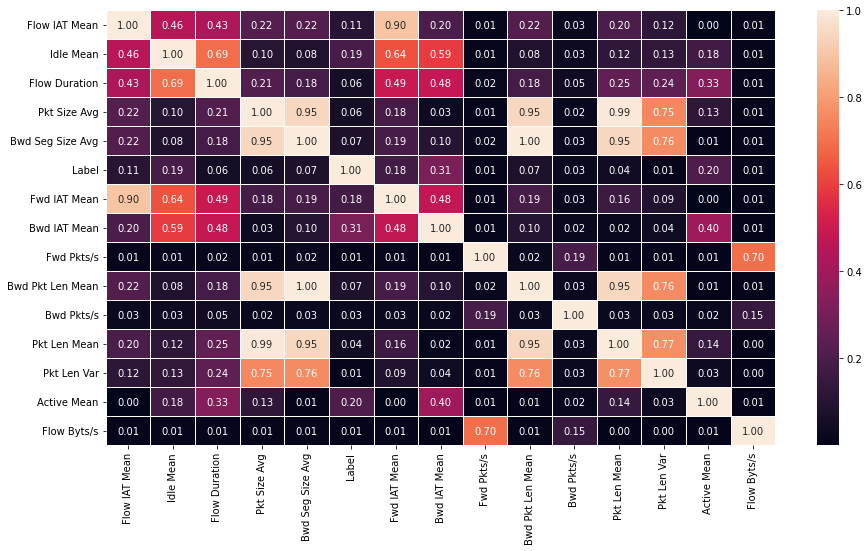

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(abs(toTrainModel.corr()), annot=True,
            linewidths=0.5, fmt='.2f', ax=ax)


Save label

In [28]:
labels = toTrainModel[LABEL]
toTrainModel = toTrainModel.drop([LABEL], axis=1)


In [29]:
def printNanFinite(data):
    print('Is any Nan:', np.any(np.isnan(data)))
    print('Is all finite:', np.all(np.isfinite(data)))


In [30]:
printNanFinite(toTrainModel)
print('\n')
printNanFinite(allDatasetToTest)


Is any Nan: False
Is all finite: True


Is any Nan: False
Is all finite: True


Scale numeric values

#### After preprocess

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    toTrainModel, labels, test_size=0.33, random_state=32)


# X_train.to_csv('X_train.csv')
# X_test.to_csv('X_test.csv')
# y_train.to_csv('y_train.csv')
# y_test.to_csv('y_test.csv')


In [32]:
isRFC = True
isMLPC = False
isSequential = False


In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense


def model():
    if isRFC:
        model = RandomForestClassifier(
            n_estimators=100, max_depth=5, min_samples_leaf=4)
    elif isMLPC:
        model = MLPClassifier(random_state=32)
    else:
        model = Sequential([
            Dense(256, activation='softplus', kernel_initializer='glorot_uniform',
                  input_dim=X_train.shape[1]),
            Dense(128, activation='softplus',
                  kernel_initializer='glorot_uniform'),
            Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid')
        ])

        model.compile(loss='binary_crossentropy',
                      optimizer='Adam')

    return model


In [34]:
model = model()


In [35]:
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, min_samples_leaf=4)

In [36]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


def confMatrix(yTrain, xTrainPreds, yTest, xTestPreds):
    # Your code here
    cmTrain = confusion_matrix(yTrain, xTrainPreds)
    X_train_disp = ConfusionMatrixDisplay(confusion_matrix=cmTrain)

    cmTest = confusion_matrix(yTest, xTestPreds)
    X_test_disp = ConfusionMatrixDisplay(confusion_matrix=cmTest)
    # End

    _, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=150)

    X_train_disp.plot(ax=ax[0])
    ax[0].set_title("Train")

    X_test_disp.plot(ax=ax[1])
    ax[1].set_title("Test")
    plt.show()


In [37]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score


def printScores(name, labels, predicts):
    print(name)
    print('Accuracy: %.3f ' % accuracy_score(labels, predicts))
    print('Precision: %.3f ' % precision_score(labels, predicts))
    print('Recall: %.3f' % recall_score(labels, predicts))
    print('F1 Score: %.3f' % f1_score(labels, predicts))
    print('\n')


In [38]:


X_train_preds = model.predict(X_train)
X_test_preds = model.predict(X_test)

if isSequential:
    print('Train auc:', roc_auc_score(y_train, X_train_preds))
    print('Test auc:', roc_auc_score(y_test, X_test_preds))
else:
    printScores('Train:', y_train, X_train_preds)
    printScores('Test:', y_test, X_test_preds)


Train:
Accuracy: 0.989 
Precision: 0.972 
Recall: 0.973
F1 Score: 0.973


Test:
Accuracy: 0.988 
Precision: 0.971 
Recall: 0.970
F1 Score: 0.971




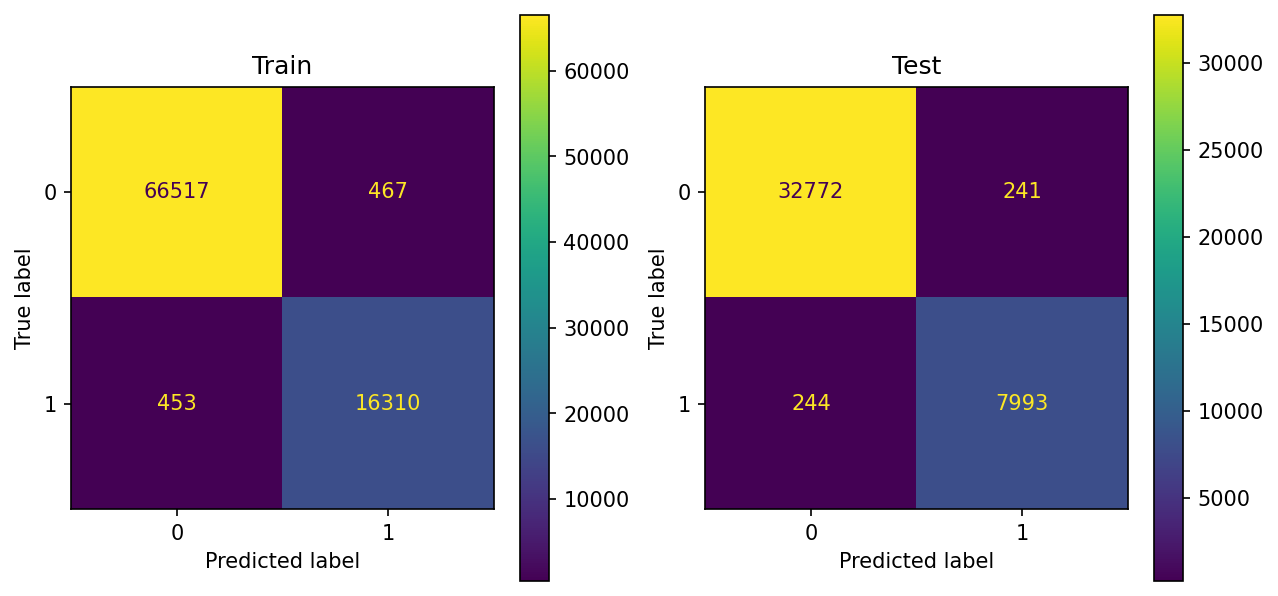

In [39]:
confMatrix(y_train, X_train_preds, y_test, X_test_preds)


In [40]:
allDatasetLabels = allDatasetToTest[LABEL]
allDatasetToTest = allDatasetToTest.drop([LABEL], axis=1)

# allDatasetLabels.to_csv('allDatasetLabels.csv')
# allDatasetToTest.to_csv('allDatasetToTest.csv')


In [41]:


AllDatasetPreds = model.predict(allDatasetToTest)

if isSequential:
    print('Auc:', roc_auc_score(allDatasetLabels, AllDatasetPreds))
else:
    printScores('All dataset:', allDatasetLabels, AllDatasetPreds)


All dataset:
Accuracy: 0.993 
Precision: 0.911 
Recall: 0.957
F1 Score: 0.933




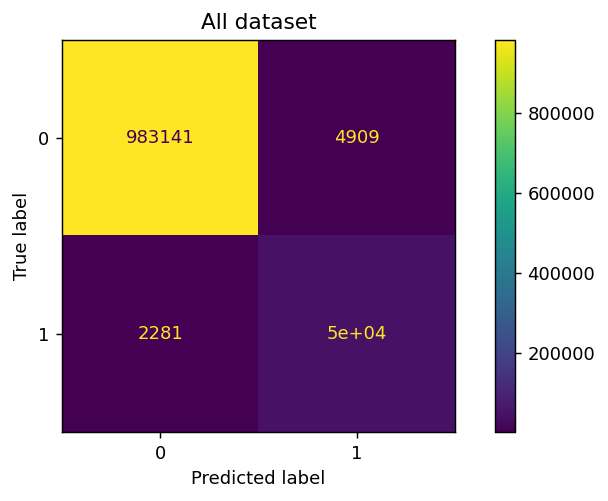

In [42]:
allDatasetConfusionMatrix = confusion_matrix(allDatasetLabels, AllDatasetPreds)
allDataSetMatrixDisplay = ConfusionMatrixDisplay(
    confusion_matrix=allDatasetConfusionMatrix)
_, ax = plt.subplots(figsize=(8, 4), dpi=130)
ax.set_title("All dataset")
allDataSetMatrixDisplay.plot(ax=ax)
plt.show()


In [43]:
selectedToSaveDataset.to_csv('DosGoldenEyeSlowloris.csv')
